<a href="https://colab.research.google.com/github/Kavita1206/Detecting_depression_through_tweets/blob/main/Week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Sentiment Analysis Dataset 2.csv', on_bad_lines = 'skip', sep = ',')

In [ ]:
df.head()

,ItemID,Sentiment,SentimentSource,SentimentText
0,1,0,Sentiment140,is so sad for my APL frie...
1,2,0,Sentiment140,I missed the New Moon trail...
2,3,1,Sentiment140,omg its already 7:30 :O
3,4,0,Sentiment140,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,Sentiment140,i think mi bf is cheating on me!!! ...


Number of Null Values in each Row

In [ ]:
df.isnull().sum()

ItemID             0
Sentiment          0
SentimentSource    0
SentimentText      0
dtype: int64

Dropping ItemID and Sentiment Source

In [ ]:
df = df.drop(['ItemID','SentimentSource'], axis = 1)

In [ ]:
df.head()

,Sentiment,SentimentText
0,0,is so sad for my APL frie...
1,0,I missed the New Moon trail...
2,1,omg its already 7:30 :O
3,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,0,i think mi bf is cheating on me!!! ...


Removing Punctuations

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
punctuation_list = list(string.punctuation)

In [ ]:
def remove_punctuations(text,punc_list=punctuation_list):
  punctuationfree = "".join(i for i in text if i not in punc_list)
  return punctuationfree

In [ ]:
df['SentimentText'] = df['SentimentText'].apply(lambda x: remove_punctuations(x))

In [ ]:
df

,Sentiment,SentimentText
0,0,is so sad for my APL friend
1,0,I missed the New Moon trailer
2,1,omg its already 730 O
3,0,Omgaga Im sooo im gunna CRy Ive be...
4,0,i think mi bf is cheating on me TT
...,...,...
1578607,1,Zzzzzz Finally Night tweeters
1578608,1,Zzzzzzz sleep well people
1578609,0,ZzzZzZzzzZ wait no I have homework
1578610,0,ZzZzzzZZZZzzz meh what am I doing up again


Removing URLs

In [ ]:
import re

In [ ]:

def remove_URLs(text):
  text= re.sub("http[s]?\://\S+", "", text)
  return text


In [ ]:
df['SentimentText'] = df['SentimentText'].apply(lambda x: remove_URLs(x))

In [ ]:
df.head()

,Sentiment,SentimentText
0,0,is so sad for my APL friend
1,0,I missed the New Moon trailer
2,1,omg its already 730 O
3,0,Omgaga Im sooo im gunna CRy Ive be...
4,0,i think mi bf is cheating on me TT


Lower Casing

In [ ]:
df['SentimentText']=df['SentimentText'].str.lower()

In [ ]:
df.head()

,Sentiment,SentimentText
0,0,is so sad for my apl friend
1,0,i missed the new moon trailer
2,1,omg its already 730 o
3,0,omgaga im sooo im gunna cry ive be...
4,0,i think mi bf is cheating on me tt


Tokenization

In [ ]:
def tokenization(text):
  return text.split()

In [ ]:
df['TokenizedText'] = df['SentimentText'].apply(lambda x: tokenization(x))

In [ ]:
df.head()

,Sentiment,SentimentText,TokenizedText
0,0,is so sad for my apl friend,"[is, so, sad, for, my, apl, friend]"
1,0,i missed the new moon trailer,"[i, missed, the, new, moon, trailer]"
2,1,omg its already 730 o,"[omg, its, already, 730, o]"
3,0,omgaga im sooo im gunna cry ive be...,"[omgaga, im, sooo, im, gunna, cry, ive, been, ..."
4,0,i think mi bf is cheating on me tt,"[i, think, mi, bf, is, cheating, on, me, tt]"


Removing StopWords

In [ ]:
import nltk

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df['After removing stopwords']=df['TokenizedText'].apply(lambda x: [item for item in x if item not in stopwords])

In [ ]:
df

,Sentiment,SentimentText,TokenizedText,After removing stopwords
0,0,is so sad for my apl friend,"[is, so, sad, for, my, apl, friend]","[sad, apl, friend]"
1,0,i missed the new moon trailer,"[i, missed, the, new, moon, trailer]","[missed, new, moon, trailer]"
2,1,omg its already 730 o,"[omg, its, already, 730, o]","[omg, already, 730]"
3,0,omgaga im sooo im gunna cry ive be...,"[omgaga, im, sooo, im, gunna, cry, ive, been, ...","[omgaga, im, sooo, im, gunna, cry, ive, dentis..."
4,0,i think mi bf is cheating on me tt,"[i, think, mi, bf, is, cheating, on, me, tt]","[think, mi, bf, cheating, tt]"
...,...,...,...,...
1578607,1,zzzzzz finally night tweeters,"[zzzzzz, finally, night, tweeters]","[zzzzzz, finally, night, tweeters]"
1578608,1,zzzzzzz sleep well people,"[zzzzzzz, sleep, well, people]","[zzzzzzz, sleep, well, people]"
1578609,0,zzzzzzzzzz wait no i have homework,"[zzzzzzzzzz, wait, no, i, have, homework]","[zzzzzzzzzz, wait, homework]"
1578610,0,zzzzzzzzzzzzz meh what am i doing up again,"[zzzzzzzzzzzzz, meh, what, am, i, doing, up, a...","[zzzzzzzzzzzzz, meh]"


Stemming

In [ ]:
from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()

In [ ]:
def stemming(text):
  stem_text = [porter_stemmer.stem(word) for word in text]
  return stem_text

In [ ]:
df['msg_stemmed'] = df['After removing stopwords'].apply(stemming)

In [ ]:
df

,Sentiment,SentimentText,TokenizedText,After removing stopwords,msg_stemmed
0,0,is so sad for my apl friend,"[is, so, sad, for, my, apl, friend]","[sad, apl, friend]","[sad, apl, friend]"
1,0,i missed the new moon trailer,"[i, missed, the, new, moon, trailer]","[missed, new, moon, trailer]","[miss, new, moon, trailer]"
2,1,omg its already 730 o,"[omg, its, already, 730, o]","[omg, already, 730]","[omg, alreadi, 730]"
3,0,omgaga im sooo im gunna cry ive be...,"[omgaga, im, sooo, im, gunna, cry, ive, been, ...","[omgaga, im, sooo, im, gunna, cry, ive, dentis...","[omgaga, im, sooo, im, gunna, cri, ive, dentis..."
4,0,i think mi bf is cheating on me tt,"[i, think, mi, bf, is, cheating, on, me, tt]","[think, mi, bf, cheating, tt]","[think, mi, bf, cheat, tt]"
...,...,...,...,...,...
1578607,1,zzzzzz finally night tweeters,"[zzzzzz, finally, night, tweeters]","[zzzzzz, finally, night, tweeters]","[zzzzzz, final, night, tweeter]"
1578608,1,zzzzzzz sleep well people,"[zzzzzzz, sleep, well, people]","[zzzzzzz, sleep, well, people]","[zzzzzzz, sleep, well, peopl]"
1578609,0,zzzzzzzzzz wait no i have homework,"[zzzzzzzzzz, wait, no, i, have, homework]","[zzzzzzzzzz, wait, homework]","[zzzzzzzzzz, wait, homework]"
1578610,0,zzzzzzzzzzzzz meh what am i doing up again,"[zzzzzzzzzzzzz, meh, what, am, i, doing, up, a...","[zzzzzzzzzzzzz, meh]","[zzzzzzzzzzzzz, meh]"


Lemmatization

In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4')
nltk.download('wordnet')
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatizer(text):
  lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
  return lemm_text

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
df['SentimentText_lemmatized']=df['After removing stopwords'].apply(lemmatizer)
df['msg_lemmatized'] = df['SentimentText_lemmatized'].agg(lambda x: ','.join(map(str,x))).str.replace(',',' ')

In [ ]:
df

,Sentiment,SentimentText,TokenizedText,After removing stopwords,msg_stemmed,SentimentText_lemmatized,msg_lemmatized
0,0,is so sad for my apl friend,"[is, so, sad, for, my, apl, friend]","[sad, apl, friend]","[sad, apl, friend]","[sad, apl, friend]",sad apl friend
1,0,i missed the new moon trailer,"[i, missed, the, new, moon, trailer]","[missed, new, moon, trailer]","[miss, new, moon, trailer]","[missed, new, moon, trailer]",missed new moon trailer
2,1,omg its already 730 o,"[omg, its, already, 730, o]","[omg, already, 730]","[omg, alreadi, 730]","[omg, already, 730]",omg already 730
3,0,omgaga im sooo im gunna cry ive be...,"[omgaga, im, sooo, im, gunna, cry, ive, been, ...","[omgaga, im, sooo, im, gunna, cry, ive, dentis...","[omgaga, im, sooo, im, gunna, cri, ive, dentis...","[omgaga, im, sooo, im, gunna, cry, ive, dentis...",omgaga im sooo im gunna cry ive dentist since ...
4,0,i think mi bf is cheating on me tt,"[i, think, mi, bf, is, cheating, on, me, tt]","[think, mi, bf, cheating, tt]","[think, mi, bf, cheat, tt]","[think, mi, bf, cheating, tt]",think mi bf cheating tt
...,...,...,...,...,...,...,...
1578607,1,zzzzzz finally night tweeters,"[zzzzzz, finally, night, tweeters]","[zzzzzz, finally, night, tweeters]","[zzzzzz, final, night, tweeter]","[zzzzzz, finally, night, tweeter]",zzzzzz finally night tweeter
1578608,1,zzzzzzz sleep well people,"[zzzzzzz, sleep, well, people]","[zzzzzzz, sleep, well, people]","[zzzzzzz, sleep, well, peopl]","[zzzzzzz, sleep, well, people]",zzzzzzz sleep well people
1578609,0,zzzzzzzzzz wait no i have homework,"[zzzzzzzzzz, wait, no, i, have, homework]","[zzzzzzzzzz, wait, homework]","[zzzzzzzzzz, wait, homework]","[zzzzzzzzzz, wait, homework]",zzzzzzzzzz wait homework
1578610,0,zzzzzzzzzzzzz meh what am i doing up again,"[zzzzzzzzzzzzz, meh, what, am, i, doing, up, a...","[zzzzzzzzzzzzz, meh]","[zzzzzzzzzzzzz, meh]","[zzzzzzzzzzzzz, meh]",zzzzzzzzzzzzz meh


In [ ]:
df = df.drop(['SentimentText','TokenizedText','After removing stopwords','msg_stemmed','SentimentText_lemmatized'],axis = 1)

In [ ]:
df.head()

,Sentiment,msg_lemmatized
0,0,sad apl friend
1,0,missed new moon trailer
2,1,omg already 730
3,0,omgaga im sooo im gunna cry ive dentist since ...
4,0,think mi bf cheating tt


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

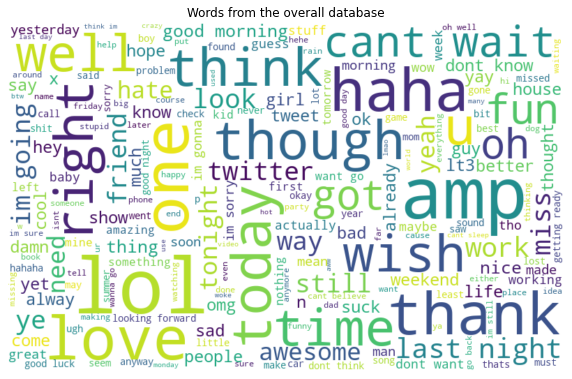

In [ ]:
All_words =' '.join([str(text) for text in df['msg_lemmatized']])

wordcloud = WordCloud(background_color = 'white',width=800, height=500, random_state = 0, max_font_size = 110).generate(All_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Words from the overall database')
plt.show()

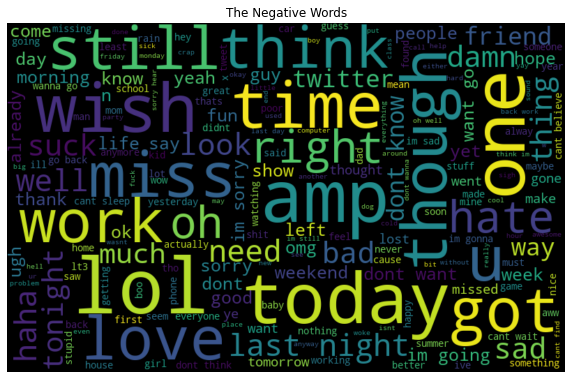

In [ ]:
negative_words =' '.join([str(text) for text in df['msg_lemmatized'][df['Sentiment'] == 0]])

wordcloud = WordCloud(background_color = 'Black',width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words')
plt.show()

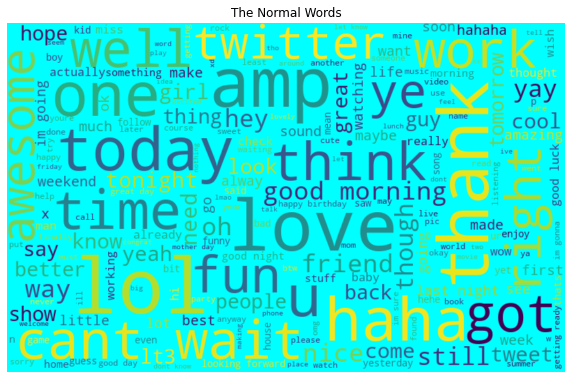

In [ ]:
normal_words =' '.join([str(text) for text in df['msg_lemmatized'][df['Sentiment'] == 1]])
wordcloud = WordCloud(background_color = 'cyan',width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Normal Words')
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM,  SpatialDropout1D
from tensorflow.keras.layers import Dense
from keras.utils.np_utils import to_categorical

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df['Sentiment'] = lb.fit_transform(df['Sentiment'])

In [ ]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=500, split=' ') 
tokenizer.fit_on_texts(df['msg_lemmatized'].values)
X = tokenizer.texts_to_sequences(df['msg_lemmatized'].values)
X = pad_sequences(X)

In [ ]:
model = Sequential()
model.add(Embedding(500, 120, input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(176, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 27, 120)           60000     
                                                                 
 spatial_dropout1d (SpatialD  (None, 27, 120)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 176)               209088    
                                                                 
 dense (Dense)               (None, 2)                 354       
                                                                 
Total params: 269,442
Trainable params: 269,442
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
from sklearn.model_selection import train_test_split 
y=pd.get_dummies(df['Sentiment'])
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
filepath = '/content/ModelCheckpoints/Checkpoint'
checkpoint = ModelCheckpoint(filepath, monitor = 'val_loss', verbose = 1, save_best_only = True , mode = 'min')

In [ ]:
model.fit( X_train, y_train, epochs = 1, batch_size=32, verbose = 2, callbacks = [checkpoint])

34533/34533 - 3771s - loss: 0.5325 - accuracy: 0.7264 - 3771s/epoch - 109ms/step


In [ ]:
validation_size = 1500
X_val = X_test[-validation_size:]
y_val = y_test[-validation_size:]
X_test = X_test[:-validation_size]
y_test = y_test[:-validation_size]
results = model.evaluate(X_test, y_test, verbose = 2, batch_size=32)
print("test loss, test acc:", results)


14753/14753 - 233s - loss: 0.5223 - accuracy: 0.7335 - 233s/epoch - 16ms/step
test loss, test acc: [0.5222692489624023, 0.7334902286529541]


In [ ]:
pos_cnt, neg_cnt, pos_correct, neg_correct = 0, 0, 0, 0
for x in range(len(X_val)):
  result = model.predict(X_val[x].reshape(1,X_test.shape[1]),batch_size=1,verbose = 2)[0]
  if np.argmax(result) == np.argmax(y_val[x]):
    if np.argmax(y_val[x]) == 0:
      neg_correct += 1
    else:
      pos_correct += 1
    
    if np.argmax(y_val[x]) == 0:
      neg_cnt += 1
    else:
      pos_cnt += 1

print("pos_acc", pos_correct/pos_cnt*100, "%")
print("neg_acc", neg_correct/neg_cnt*100, "%")

In [ ]:
from time import time
from collections import defaultdict
import spacy
from gensim.models import Word2Vec
import logging
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)
from sklearn.manifold import TSNE
from numpy import dot
from numpy.linalg import norm

In [ ]:
df

In [ ]:
df1 = df.apply(lambda x: ','.join(x.astype(str)), axis=1)

In [ ]:
df_clean = pd.DataFrame({'clean': df1})
df_clean

In [ ]:
document = [row.split(',') for row in df_clean['clean']]


In [ ]:
document[:5]

In [ ]:
genism_model = Word2Vec(document, min_count=10,size= 300,workers=8, window =7)

In [ ]:
words = genism_model.wv.vocab.keys()
vocab_size = len(words)
print("Vocab size", vocab_size)

In [ ]:
genism_model.train(document, total_examples=len(document), epochs=32)

In [ ]:
genism_model.most_similar('miss')

In [ ]:
similar_words =str([x[0] for x in genism_model.most_similar("miss",topn=100)])

wordcloud = WordCloud(background_color = 'white',width=800, height=500, random_state =42, max_font_size = 110).generate(similar_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Words similar to miss')
plt.show()

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['msg_lemmatized'])
vocab_size = len(tokenizer.word_index)+1
print('Vocab Size is ',vocab_size)

In [ ]:
SEQUENCE_LENGTH = 300
EPOCHS = 8
BATCH_SIZE = 1024

In [ ]:
X = tokenizer.texts_to_sequences(df['msg_lemmatized'])
X = pad_sequences(X, maxlen = SEQUENCE_LENGTH)

In [ ]:
Y = df['Sentiment']

In [ ]:
print(X.shape)
print(Y.shape)
Y = Y.values.reshape(-1,1)

In [ ]:
genism_model.wv['miss'].shape

In [ ]:
W2V_SIZE = 300
embedding_matrix = np.zeros((vocab_size , W2V_SIZE))
for word , i in tokenizer.word_index.items():
    if word in genism_model.wv:
        embedding_matrix[i] = genism_model.wv[word]
print(embedding_matrix.shape)

In [ ]:
embedding_layer = Embedding( vocab_size , W2V_SIZE , weights = [embedding_matrix] , input_length = SEQUENCE_LENGTH, trainable = False)
model = Sequential()
model.add(embedding_layer)
model.add(LSTM(128 , dropout = 0.2 , recurrent_dropout = 0.2 ,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64, dropout = 0.2 , recurrent_dropout = 0.2 ))
model.add(Dropout(0.1))
model.add(Dense(1,activation = 'sigmoid'))
model.summary()

In [ ]:
model.compile(loss = 'binary_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'] )
callbacks = [ ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0),
              EarlyStopping(monitor='val_acc', min_delta=1e-4, patience=5)]

In [ ]:
hist = model.fit(X, Y , batch_size = BATCH_SIZE , epochs = EPOCHS , validation_split = 0.1  , verbose = 1 , callbacks = callbacks)

In [ ]:
def predict(text):
  start_at = time.time()
  x_test = pad_sequences(tokenizer.text_to_sequences([text]), maxlen = SEQUENCE_LENGTH)
  score = model.predict([X_test])[0]

  return {"score":float(score), 
          "elapsed_time": time.time()-start_at}

In [ ]:
class LogReg:
  
  def __init__(self, l_rate, epochs, n_features):
    self.l_rate = l_rate
    self.epochs = epochs
    self.coef = [0.0]*n_features
    self.bias = 0.0

  def sigmoid(self, score, threshold = 2.0):
    if abs(score) > threshold:
      score = threshold*sign(score)
      activation = exp(score)
    
    return activation/(1.0 + activation)

  def predict(self, features):
    value = sum([features[i]*self.coef[i] for i in range(len(features))]) + self.bias
    return self.sigmoid(value)
  
  def sg_update(self, features, label):
    yhat = self.predict(features)
    e = label-yhat
    self.bias = self.bias + self.l_rate * e * yhat * (1-yhat)
    for i in range(len(features)):
      self.coef[i] = self.coef[i] + self.l_rate * e * yhat * (1-yhat) * features[i]
      return
  
  def train(self, X, y):
    for epoch in range(self.epochs):
      for features, label in zip(X, y):
        self.sg_update(features, label)
    return self.bias, self.coef


In [ ]:
def get_accuracy(y_bar, y_pred):
  correct = 0
  for i in range(len(y_bar)):
    if y_bar[i] == y_pred[i]:
      correct += 1
      accuracy = (correct / len(y_bar)) * 100.0
  return accuracy

In [ ]:
LEARNING_RATE = 0.1
EPOCHS = 10

In [ ]:
logreg = LogReg(LEARNING_RATE, EPOCHS, len(X[0]))
bias_logreg, weights_logreg = logreg.train(X, Y)
y_logistic = [round(logreg.predict(example)) for example in X_test]

In [ ]:
accuracy_logistic = get_accuracy(y_logistic, y_test)
print('Logistic Regression Accuracy: {:0.3f}'.format(accuracy_logistic))

In [ ]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.save_weights('model_weights.h5')
with open('model_architecture.json', 'w') as f:
    f.write(model.to_json())
    
model.save('entire_model.h5')
tokenizer_json = tokenizer.to_json()
with open('tokenizer.json', 'w', encoding='utf-8') as f:
    f.write(json.dumps(tokenizer_json, ensure_ascii=False))